In [2]:
import csv
import os
import pandas as pd
from tqdm import tqdm
from matplotlib import cm
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection
import seaborn as sns
import matplotlib.pyplot as plt  
import anndata as ad
from collections import Counter
from IPython.display import set_matplotlib_formats
import numpy as np
import scanpy as sc
from sklearn.metrics import pairwise_distances
import glob


## Data reading

In [3]:
path = "/home/o313a/olga/aurelie_data/LFS041_p63/atac_only/readCount_filtered_bam/*.seg"

In [4]:
work_dir = "/home/o313a/olga/aurelie_data/LFS041_p63/atac_only/"

In [7]:

files = glob.glob(path)
barcodes = []
step = 100000
counts = []
for i,file_name in enumerate(tqdm(files)):
    cs = []
    try:
        file = pd.read_csv(file_name, sep = "\t", header = None)
        barcode = file_name.split("/")[-1].split("_")[-1].split('.')[0]
        barcodes.append(barcode)
        for tup in file.itertuples():
            try:
                c = int(tup[1])
                cs.append(c)
            except ValueError:
                pass
        counts.append(cs)
    except:
        print(file_name)
for i,file_name in enumerate(tqdm(files)):
    chrom,start = ['','']

    if i == 0:
        regions = []
        print("recording")
        file = pd.read_csv(file_name, sep = "\t", header = None)
        for tup in file.itertuples():
            try:
                c = int(tup[1])
                regions.append((chrom,start0))
                start0 = start0+step
            except ValueError:
                chrom, start, _ = [x.split("=")[1] for x in tup[1].split(" ")[1:-1]]
                start0 = int(start)
                pass

100%|██████████| 4256/4256 [00:00<00:00, 51645.05it/s]

recording


In [8]:
counts_df_orig = pd.DataFrame(counts)
counts_df_orig.index = barcodes
counts_df_orig.columns = [f"{x[0]}:{x[1]}-{x[1]+step}" for x in regions]

In [9]:
def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    arr = np.sort(arr)
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)
def gini(arr):
    ## first sort
    sorted_arr = arr.copy()
    sorted_arr = np.sort(sorted_arr)
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

In [10]:
gini_matac = counts_df_orig.apply(lambda row: gini(row), axis=1).values

In [11]:
counts_df_orig = counts_df_orig[gini_matac < 0.9]

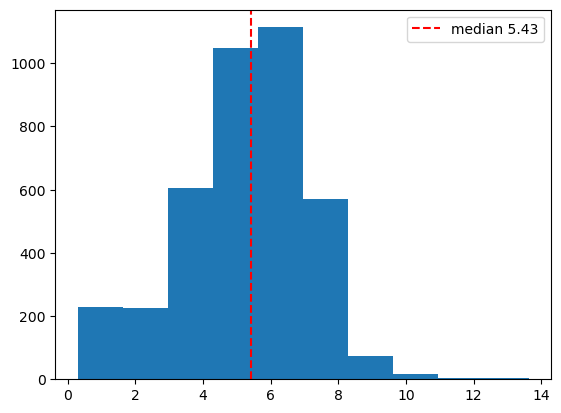

In [12]:

plt.hist(counts_df_orig.mean(axis =1))
m = counts_df_orig.mean(axis =1).median()
plt.axvline(m, label = f"median {m:.2f}", color = "red", ls = "--")
plt.legend()

In [13]:
counts_df_orig.sum(axis = 1)

TTGCCCATCTACTTTG-1    210625
GCCAGCATCCTAAAGC-1    154759
GAAATGATCTACCCGT-1    142837
ACAATCGTCACTCCCA-1    196551
GCACGGTGTGATGTGG-1    137910
                       ...  
GCGCATGAGGTCGTTT-1    141911
TCGCAGGTCTTCCACG-1    226126
TTTGTGTCACGATTAC-1    140497
TTACCGCCAAGCGTCC-1    130942
GCTTGCTAGTATGCTC-1    138518
Length: 3888, dtype: int64

In [14]:
counts_df_orig.head()

chr1:1-100001  chr1:100001-200001  chr1:200001-300001   
TTGCCCATCTACTTTG-1              0                   0                   0  \
GCCAGCATCCTAAAGC-1              0                   0                   0   
GAAATGATCTACCCGT-1              0                   0                   0   
ACAATCGTCACTCCCA-1              0                   0                   0   
GCACGGTGTGATGTGG-1              0                   0                   0   

                    chr1:300001-400001  chr1:400001-500001   
TTGCCCATCTACTTTG-1                   0                   0  \
GCCAGCATCCTAAAGC-1                   0                   0   
GAAATGATCTACCCGT-1                   0                   0   
ACAATCGTCACTCCCA-1                   0                   0   
GCACGGTGTGATGTGG-1                   0                   0   

                    chr1:500001-600001  chr1:600001-700001   
TTGCCCATCTACTTTG-1                   0                   2  \
GCCAGCATCCTAAAGC-1                   0                   0   
GAAATGATCTACCCGT-1                   0                   0   
ACAATCGTCACTCCCA-1                   0                   2   
GCACGGTGTGATGTGG-1                   0                  14   

                    chr1:700001-800001  chr1:800001-900001   
TTGCCCATCTACTTTG-1                   4                   2  \
GCCAGCATCCTAAAGC-1                   0                   6   
GAAATGATCTACCCGT-1                   0                   6   
ACAATCGTCACTCCCA-1                   0                   8   
GCACGGTGTGATGTGG-1                   0                   2   

                    chr1:900001-1000001  ...  chrY:56300001-56400001   
TTGCCCATCTACTTTG-1                   12  ...                       0  \
GCCAGCATCCTAAAGC-1                    2  ...                       0   
GAAATGATCTACCCGT-1                    9  ...                       0   
ACAATCGTCACTCCCA-1                   12  ...                       0   
GCACGGTGTGATGTGG-1                    6  ...                       0   

                    chrY:56400001-56500001  chrY:56500001-56600001   
TTGCCCATCTACTTTG-1                       0                       0  \
GCCAGCATCCTAAAGC-1                       0                       0   
GAAATGATCTACCCGT-1                       0                       0   
ACAATCGTCACTCCCA-1                       0                       0   
GCACGGTGTGATGTGG-1                       0                       0   

                    chrY:56600001-56700001  chrY:56700001-56800001   
TTGCCCATCTACTTTG-1                       0                       0  \
GCCAGCATCCTAAAGC-1                       0                       0   
GAAATGATCTACCCGT-1                       0                       0   
ACAATCGTCACTCCCA-1                       0                       0   
GCACGGTGTGATGTGG-1                       0                       0   

                    chrY:56800001-56900001  chrY:56900001-57000001   
TTGCCCATCTACTTTG-1                      12                       0  \
GCCAGCATCCTAAAGC-1                      11                       0   
GAAATGATCTACCCGT-1                       9                       0   
ACAATCGTCACTCCCA-1                       4                       0   
GCACGGTGTGATGTGG-1                      11                       0   

                    chrY:57000001-57100001  chrY:57100001-57200001   
TTGCCCATCTACTTTG-1                       0                       0  \
GCCAGCATCCTAAAGC-1                       0                       0   
GAAATGATCTACCCGT-1                       0                       0   
ACAATCGTCACTCCCA-1                       0                       0   
GCACGGTGTGATGTGG-1                       0                       0   

                    chrY:57200001-57300001  
TTGCCCATCTACTTTG-1                       0  
GCCAGCATCCTAAAGC-1                       0  
GAAATGATCTACCCGT-1                       0  
ACAATCGTCACTCCCA-1                       0  
GCACGGTGTGATGTGG-1                       0  

[5 rows x 30894 columns]

In [15]:
counts_df_orig.shape

(3888, 30894)

## changing resolution to 1MB

In [16]:
counts = counts_df_orig.copy().values

In [17]:
new_step = 1000000
i0 = 0
chrom = "chr1"
start0 = 1
new_counts = []
counts0 =np.zeros(counts_df_orig.shape[0])
new_regions = []
for i,rec in tqdm(enumerate(regions)):
    if rec[0] == chrom and (rec[1] - start0 < new_step):
        counts0 += counts[:,i]
        region = f"{rec[0]}:{start0}-{start0+new_step}"
    else:
        new_counts.append(counts0)
        new_regions.append(region)
        start0 = rec[1]
        counts0 = counts[:,i]
        chrom = rec[0]
        region = f"{rec[0]}:{start0}-{start0+new_step}"

30894it [00:00, 46669.26it/s]


In [18]:
counts_df = pd.DataFrame(new_counts, index = new_regions, columns = counts_df_orig.index).T

In [19]:
counts_df.head()

chr1:1-1000001  chr1:1000001-2000001   
TTGCCCATCTACTTTG-1            20.0                 105.0  \
GCCAGCATCCTAAAGC-1             8.0                  49.0   
GAAATGATCTACCCGT-1            15.0                  52.0   
ACAATCGTCACTCCCA-1            22.0                  94.0   
GCACGGTGTGATGTGG-1            22.0                  38.0   

                    chr1:2000001-3000001  chr1:3000001-4000001   
TTGCCCATCTACTTTG-1                  54.0                 120.0  \
GCCAGCATCCTAAAGC-1                  78.0                  95.0   
GAAATGATCTACCCGT-1                  54.0                  74.0   
ACAATCGTCACTCCCA-1                 131.0                 114.0   
GCACGGTGTGATGTGG-1                  94.0                 139.0   

                    chr1:4000001-5000001  chr1:5000001-6000001   
TTGCCCATCTACTTTG-1                  67.0                  79.0  \
GCCAGCATCCTAAAGC-1                  73.0                 112.0   
GAAATGATCTACCCGT-1                  44.0                  48.0   
ACAATCGTCACTCCCA-1                  82.0                 114.0   
GCACGGTGTGATGTGG-1                 137.0                 131.0   

                    chr1:6000001-7000001  chr1:7000001-8000001   
TTGCCCATCTACTTTG-1                 138.0                 118.0  \
GCCAGCATCCTAAAGC-1                 131.0                 126.0   
GAAATGATCTACCCGT-1                  63.0                  49.0   
ACAATCGTCACTCCCA-1                 133.0                  94.0   
GCACGGTGTGATGTGG-1                  70.0                  61.0   

                    chr1:8000001-9000001  chr1:9000001-10000001  ...   
TTGCCCATCTACTTTG-1                 137.0                   79.0  ...  \
GCCAGCATCCTAAAGC-1                 104.0                   94.0  ...   
GAAATGATCTACCCGT-1                  38.0                   56.0  ...   
ACAATCGTCACTCCCA-1                 101.0                  105.0  ...   
GCACGGTGTGATGTGG-1                  28.0                   34.0  ...   

                    chrY:47000001-48000001  chrY:48000001-49000001   
TTGCCCATCTACTTTG-1                     0.0                     0.0  \
GCCAGCATCCTAAAGC-1                     0.0                     0.0   
GAAATGATCTACCCGT-1                     0.0                     0.0   
ACAATCGTCACTCCCA-1                     0.0                     0.0   
GCACGGTGTGATGTGG-1                     0.0                     0.0   

                    chrY:49000001-50000001  chrY:50000001-51000001   
TTGCCCATCTACTTTG-1                     0.0                     0.0  \
GCCAGCATCCTAAAGC-1                     0.0                     0.0   
GAAATGATCTACCCGT-1                     0.0                     0.0   
ACAATCGTCACTCCCA-1                     0.0                     0.0   
GCACGGTGTGATGTGG-1                     0.0                     0.0   

                    chrY:51000001-52000001  chrY:52000001-53000001   
TTGCCCATCTACTTTG-1                     0.0                     0.0  \
GCCAGCATCCTAAAGC-1                     0.0                     0.0   
GAAATGATCTACCCGT-1                     0.0                     0.0   
ACAATCGTCACTCCCA-1                     0.0                     0.0   
GCACGGTGTGATGTGG-1                     0.0                     0.0   

                    chrY:53000001-54000001  chrY:54000001-55000001   
TTGCCCATCTACTTTG-1                     0.0                     0.0  \
GCCAGCATCCTAAAGC-1                     0.0                     0.0   
GAAATGATCTACCCGT-1                     0.0                     0.0   
ACAATCGTCACTCCCA-1                     0.0                     0.0   
GCACGGTGTGATGTGG-1                     0.0                     0.0   

                    chrY:55000001-56000001  chrY:56000001-57000001  
TTGCCCATCTACTTTG-1                     0.0                    12.0  
GCCAGCATCCTAAAGC-1                     0.0                    11.0  
GAAATGATCTACCCGT-1                     0.0                     9.0  
ACAATCGTCACTCCCA-1                     0.0                     4.0  
GCACGG

In [20]:
counts_df.to_csv(work_dir+ "counts_1mb.csv")

## Create anndata object and filter

In [21]:
adata = sc.AnnData(counts_df)


In [22]:
adata.raw =adata

In [23]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)


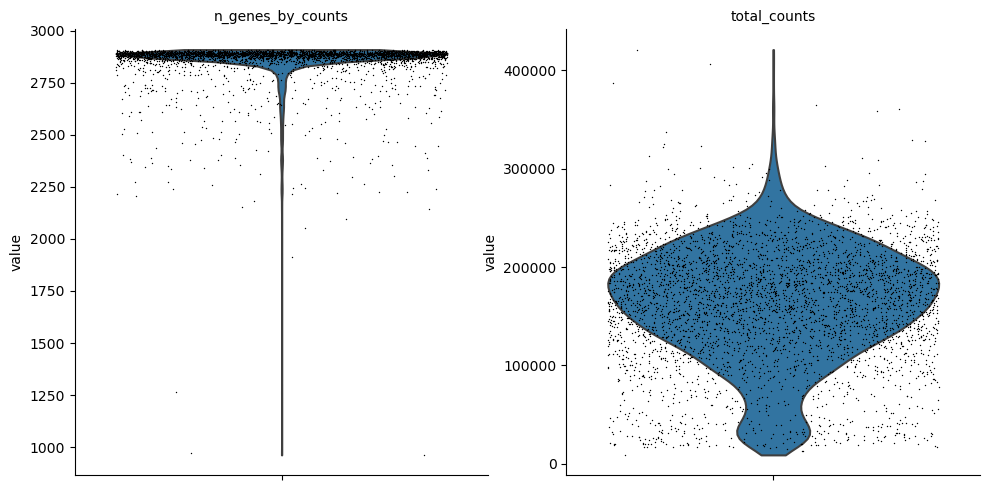

/omics/groups/OE0540/internal/B260/users/olga/.conda/envs/scdna/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [24]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'],
             jitter=0.4, multi_panel=True)
adata = adata[adata.obs.total_counts > 10000, :]
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [25]:
%%time
num_comp = 1500
sc.tl.pca(adata, svd_solver='arpack', n_comps = num_comp)
print(np.cumsum(adata.uns["pca"]['variance_ratio'])[-1])

0.9683124275561282
CPU times: user 33min 35s, sys: 21min 12s, total: 54min 47s
Wall time: 4min 28s


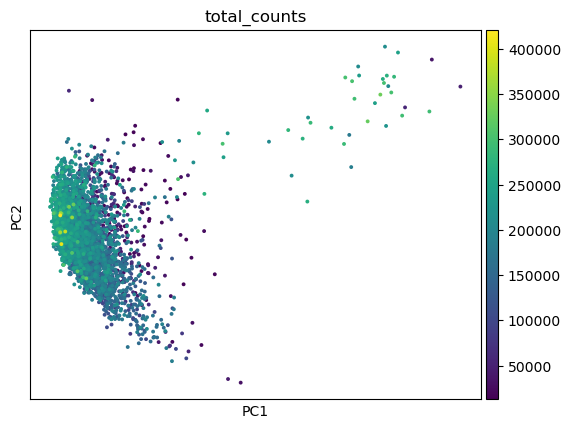

In [26]:
sc.pl.pca(adata,color = "total_counts")


In [27]:
adata.obsm["X_pca"].shape

(3887, 1500)

In [28]:
adata

AnnData object with n_obs × n_vars = 3887 × 3101
    obs: 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [29]:
sc.pp.neighbors(adata,n_pcs = num_comp)


/omics/groups/OE0540/internal/B260/users/olga/.conda/envs/scdna/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:


sc.tl.leiden(adata)
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')


In [31]:
adata.obs["coverage"] = (adata.obs["total_counts"] *51)/3099750718

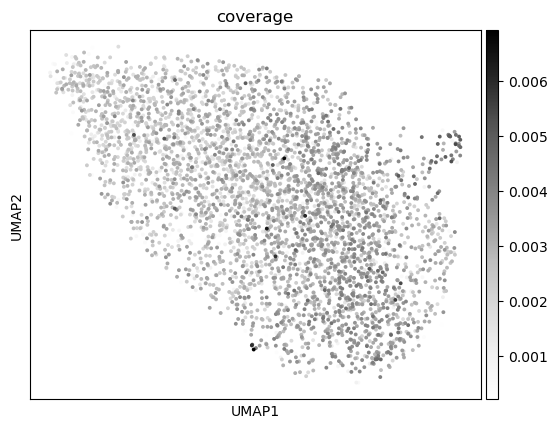

In [33]:
sc.pl.umap(adata, color = "coverage", show = False, color_map = "Greys")
plt.savefig("final_figures/metacells/cells_umap.png", dpi = 300)
plt.savefig("final_figures/metacells/cells_umap.pdf", dpi = 300)
plt.show()


## Metacelling

In [39]:
max_covergae = 1100
min_coverage = 200

In [40]:
#set the resolution such that the maximum coverag is close to max_covergae
# higher resolution =>  lower maximum coverage
sc.tl.leiden(adata, resolution = 108, key_added = "leiden_small")
clust_df = []
clusters = adata.obs.leiden_small.unique()
for meta in clusters:
    dat = adata.obs[adata.obs.leiden_small == meta]
    subset = adata[dat.index]
    clust_df.append([meta,
                     counts_df.loc[dat.index].sum(axis = 0).mean(),
                     subset.shape[0],
                     float(subset.obsm['X_umap'][:,0].mean()),float(subset.obsm['X_umap'][:,1].mean()),
                     # float(subset.obsm['X_pca'][:,0].mean()),float(subset.obsm['X_pca'][:,1].mean()),
                    *subset.obsm["X_pca"].mean(axis = 0)])
clust_df = pd.DataFrame(clust_df, columns = ["cl", "coverage", "n_cells","umap_x","umap_y",*[f"PC_{i}" for i in range(num_comp)]])
print(clust_df.coverage.min(),clust_df.coverage.max())


10.219929055143503 1036.6530151564011


In [41]:
clust_df["pass_min"] = clust_df.coverage>=min_coverage
clust_df["pass_max"] = clust_df.coverage<=max_covergae

In [42]:
clust_df["counts_per_1MB"] = clust_df["coverage"]

In [110]:
adata.obs["counts_per_1MB"] = adata.obs["total_counts"]/adata.var.shape[0]

In [5]:
sns.set(style="white", font_scale = 1)


In [118]:
sns.reset_defaults()

/tmp/ipykernel_14572/2919088216.py:11: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  p1.figure.colorbar(sm)


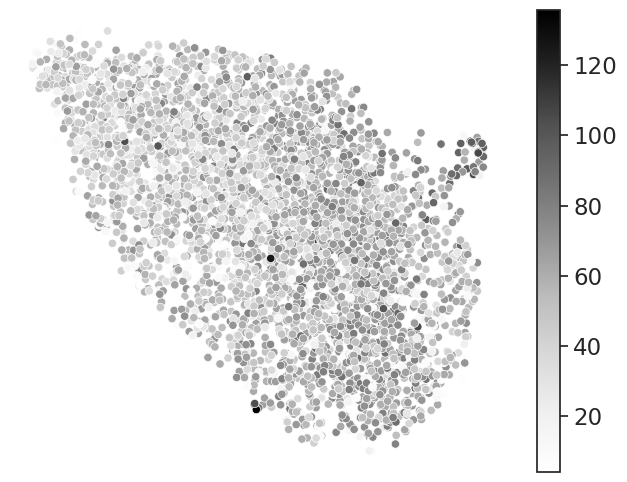

In [322]:
# f, ax = plt.subplots()
f, ax = plt.subplots(figsize=(8, 6))

p1 = sns.scatterplot(x = adata.obsm['X_umap'][:,0], y = adata.obsm['X_umap'][:,1], palette = "Greys", hue = adata.obs["counts_per_1MB"],
                    ax = ax)
norm = plt.Normalize(adata.obs["counts_per_1MB"].min(), adata.obs["counts_per_1MB"].max())
sm = plt.cm.ScalarMappable(cmap="Greys", norm=norm)
sm.set_array([])

p1.get_legend().remove()
p1.figure.colorbar(sm)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.savefig("final_figures/metacells/cells_umap.png", dpi = 300)
plt.savefig("final_figures/metacells/cells_umap.pdf", dpi = 300)
plt.show()

In [77]:
import matplotlib.colors as mcolors



In [91]:
palette = sns.color_palette("Purples", as_cmap = True)


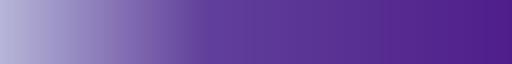

In [92]:
custom_colormap = mcolors.LinearSegmentedColormap.from_list(
    "CustomPurple", [(0, palette(0.4)), (0.4, palette(0.8)), (1, palette(0.9))]
)
custom_colormap

/tmp/ipykernel_14572/1447375510.py:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  p2.figure.colorbar(sm)


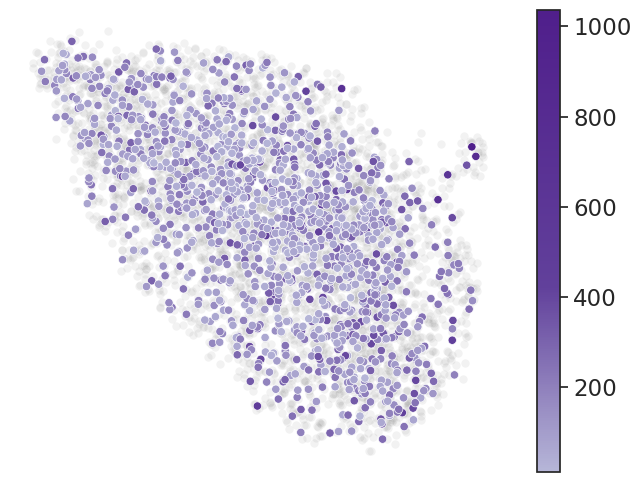

In [321]:
# f, ax = plt.subplots()
f, ax = plt.subplots(figsize=(8, 6))

p1 = sns.scatterplot(x = adata.obsm['X_umap'][:,0], y = adata.obsm['X_umap'][:,1], alpha = 0.1, color = "grey", ax = ax)
p2 = sns.scatterplot(x = clust_df.umap_x, y = clust_df.umap_y, hue = clust_df.counts_per_1MB,palette = custom_colormap, ax = ax)

norm = plt.Normalize(clust_df.counts_per_1MB.min(), clust_df.counts_per_1MB.max())
sm = plt.cm.ScalarMappable(cmap=custom_colormap, norm=norm)
sm.set_array([])

p2.get_legend().remove()
p2.figure.colorbar(sm)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.savefig("final_figures/metacells/pre_metacells.png", dpi = 300)
plt.savefig("final_figures/metacells/pre_metacells.pdf", dpi = 300)
plt.show()

<Axes: xlabel='PC_0', ylabel='PC_1'>

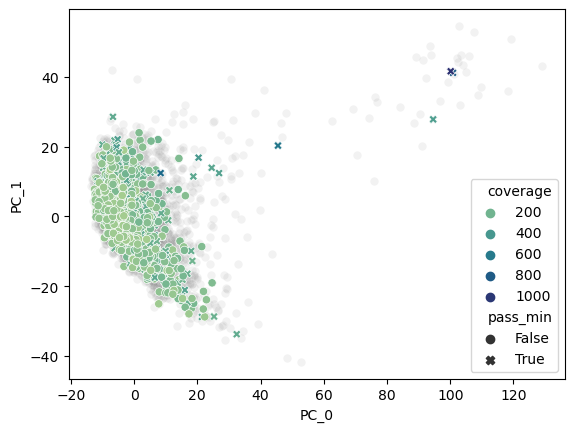

In [72]:
sns.scatterplot(x = adata.obsm['X_pca'][:,0], y = adata.obsm['X_pca'][:,1], alpha = 0.1, color = "grey")
sns.scatterplot(x = clust_df.PC_0, y = clust_df.PC_1, hue = clust_df.coverage, style = clust_df["pass_min"],palette = "crest")

In [130]:
sns.set(style="white", font_scale = 1.5)


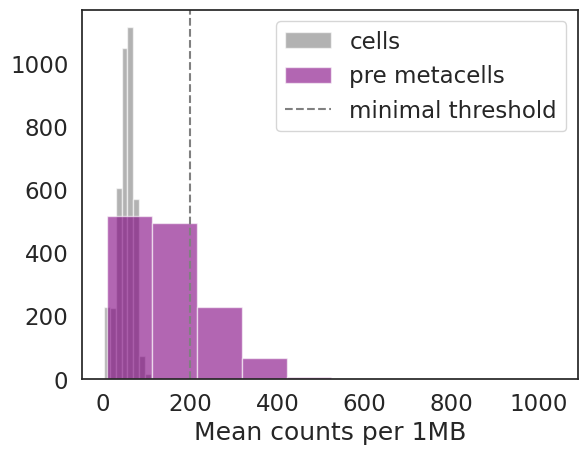

In [131]:
plt.hist(counts_df.mean(axis =1), label = "cells", alpha = 0.6, color = "grey")
plt.hist(clust_df.coverage, alpha = 0.6, label = "pre metacells", color = "purple")

plt.axvline(200, label = "minimal threshold", ls = "--", color = "grey")
plt.legend()
plt.savefig("final_figures/metacells/pre_histo.png", dpi = 300)
plt.savefig("final_figures/metacells/pre_histo.pdf", dpi = 300)
plt.xlabel("Mean counts per 1MB")
plt.show()

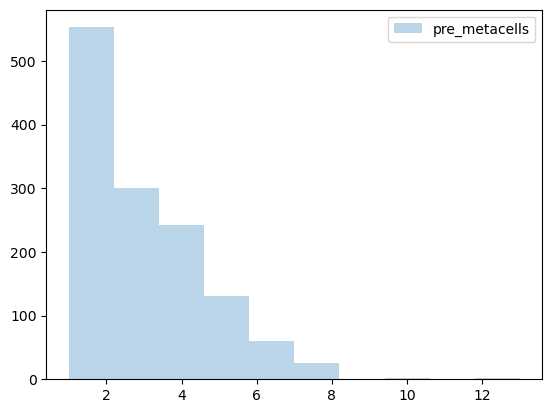

In [75]:
plt.hist(clust_df.n_cells, alpha = 0.3, label = "pre_metacells")
plt.legend()

In [96]:
import create_metacells
import importlib
importlib.reload(create_metacells)


<module 'create_metacells' from '/omics/groups/OE0540/internal/users/olga/aurelie_data/analysis/create_metacells.py'>

(array([6.59120e+04, 5.47768e+05, 2.12214e+05, 3.33100e+04, 4.70700e+03,
        4.60000e+01, 5.00000e+00, 7.00000e+00, 2.04200e+03, 1.89200e+03]),
 array([ 13.03386402,  25.49225044,  37.95063782,  50.4090271 ,
         62.86741257,  75.32579803,  87.78418732, 100.2425766 ,
        112.70096588, 125.15934753, 137.61773682]),
 <BarContainer object of 10 artists>)

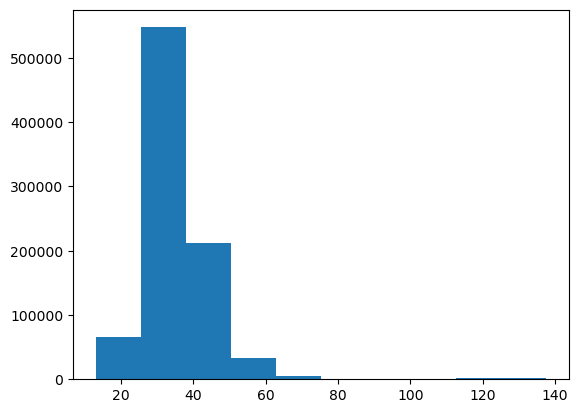

In [97]:
pcs = [x for x in clust_df.columns if x.startswith("PC")]

dist = pairwise_distances(clust_df[pcs])
plt.hist(dist[np.triu_indices(dist.shape[0], k = 1)])

In [98]:
tmp = pd.DataFrame(adata.X, index = adata.obs.index, columns = adata.var.index)

In [99]:
ts = np.quantile(dist[np.triu_indices(dist.shape[0], k = 1)], np.linspace(0.01,1, num = 10))


metacells to process: 949
Iteration 0
metacells to process: 141
Iteration 1
metacells to process: 65
Iteration 2
metacells to process: 14
Iteration 3
metacells to process: 0
DONE with 378 metacells in total


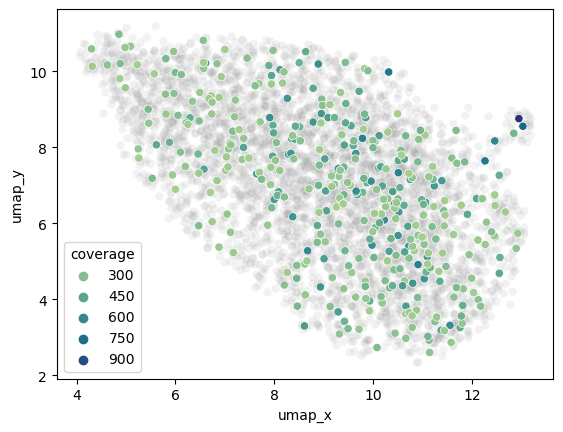

Done with run 0: th. 21.20, # metacells 378, median size 5.0, 1721 cells excluded, median coverage 290.25
metacells to process: 949
Iteration 0
metacells to process: 486
Iteration 1
metacells to process: 281
Iteration 2
metacells to process: 132
Iteration 3
metacells to process: 46
Iteration 4
metacells to process: 11
Iteration 5
metacells to process: 0
DONE with 428 metacells in total


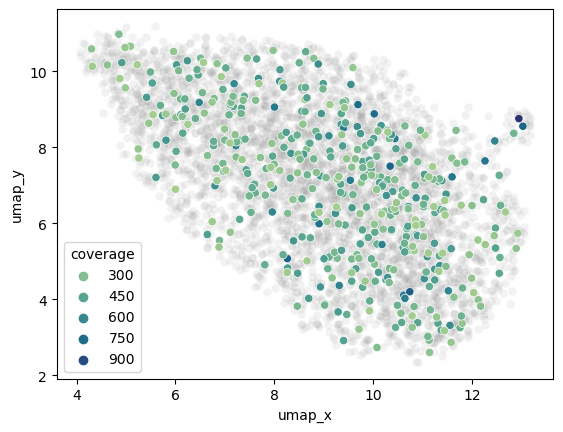

Done with run 1: th. 26.89, # metacells 428, median size 7.0, 941 cells excluded, median coverage 364.58
metacells to process: 949
Iteration 0
metacells to process: 574
Iteration 1
metacells to process: 387
Iteration 2
metacells to process: 233
Iteration 3
metacells to process: 116
Iteration 4
metacells to process: 46
Iteration 5
metacells to process: 5
Iteration 6
metacells to process: 1
Iteration 7
metacells to process: 0
DONE with 448 metacells in total


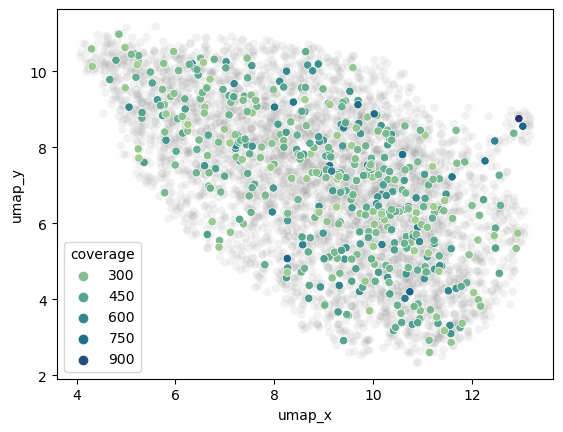

Done with run 2: th. 29.36, # metacells 448, median size 7.0, 661 cells excluded, median coverage 373.81
metacells to process: 949
Iteration 0
metacells to process: 625
Iteration 1
metacells to process: 430
Iteration 2
metacells to process: 277
Iteration 3
metacells to process: 170
Iteration 4
metacells to process: 87
Iteration 5
metacells to process: 31
Iteration 6
metacells to process: 6
Iteration 7
metacells to process: 2
Iteration 8
metacells to process: 0
DONE with 458 metacells in total


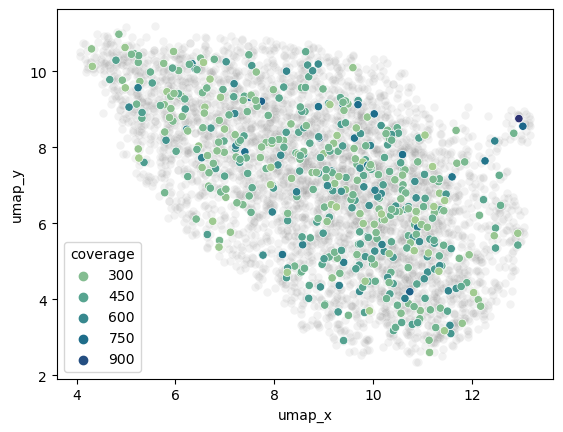

Done with run 3: th. 31.32, # metacells 458, median size 7.0, 501 cells excluded, median coverage 373.95
metacells to process: 949
Iteration 0
metacells to process: 648
Iteration 1
metacells to process: 452
Iteration 2
metacells to process: 303
Iteration 3
metacells to process: 194
Iteration 4
metacells to process: 112
Iteration 5
metacells to process: 49
Iteration 6
metacells to process: 11
Iteration 7
metacells to process: 0
DONE with 467 metacells in total


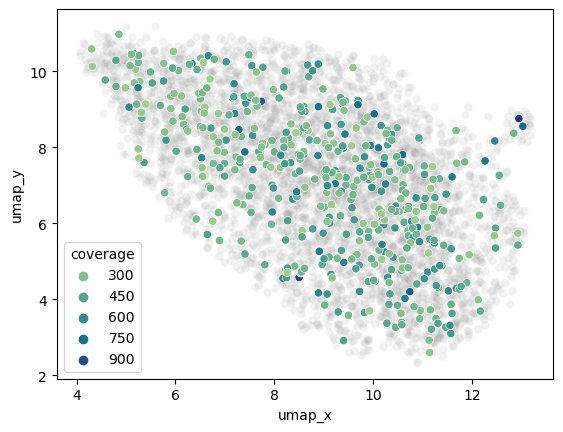

Done with run 4: th. 33.11, # metacells 467, median size 7.0, 359 cells excluded, median coverage 375.73
metacells to process: 949
Iteration 0
metacells to process: 661
Iteration 1
metacells to process: 464
Iteration 2
metacells to process: 322
Iteration 3
metacells to process: 217
Iteration 4
metacells to process: 141
Iteration 5
metacells to process: 82
Iteration 6
metacells to process: 34
Iteration 7
metacells to process: 6
Iteration 8
metacells to process: 0
DONE with 470 metacells in total


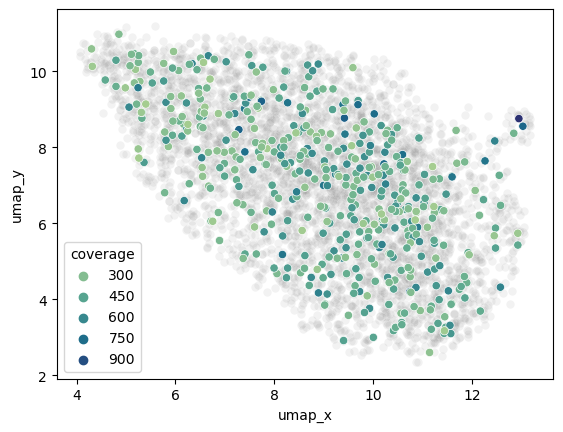

Done with run 5: th. 34.97, # metacells 470, median size 7.0, 250 cells excluded, median coverage 384.12
metacells to process: 949
Iteration 0
metacells to process: 678
Iteration 1
metacells to process: 476
Iteration 2
metacells to process: 334
Iteration 3
metacells to process: 228
Iteration 4
metacells to process: 156
Iteration 5
metacells to process: 90
Iteration 6
metacells to process: 37
Iteration 7
metacells to process: 10
Iteration 8
metacells to process: 1
Iteration 9
metacells to process: 0
DONE with 476 metacells in total


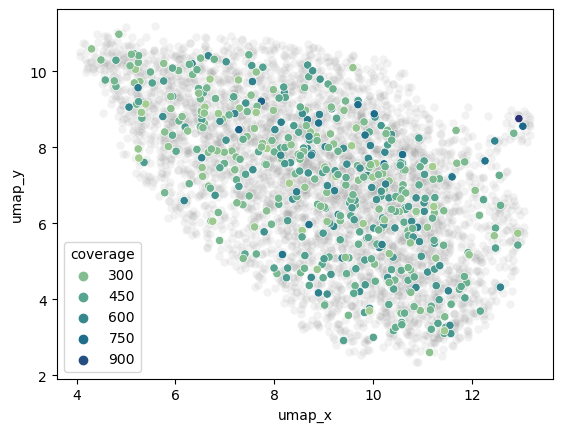

Done with run 6: th. 37.10, # metacells 476, median size 7.0, 165 cells excluded, median coverage 387.31
metacells to process: 949
Iteration 0
metacells to process: 687
Iteration 1
metacells to process: 485
Iteration 2
metacells to process: 346
Iteration 3
metacells to process: 239
Iteration 4
metacells to process: 162
Iteration 5
metacells to process: 89
Iteration 6
metacells to process: 46
Iteration 7
metacells to process: 14
Iteration 8
metacells to process: 2
Iteration 9
metacells to process: 0
DONE with 478 metacells in total


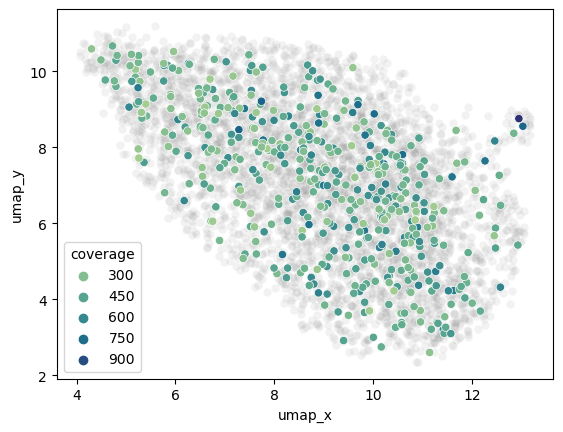

Done with run 7: th. 39.91, # metacells 478, median size 8.0, 73 cells excluded, median coverage 392.02
metacells to process: 949
Iteration 0
metacells to process: 694
Iteration 1
metacells to process: 487
Iteration 2
metacells to process: 352
Iteration 3
metacells to process: 244
Iteration 4
metacells to process: 168
Iteration 5
metacells to process: 96
Iteration 6
metacells to process: 48
Iteration 7
metacells to process: 21
Iteration 8
metacells to process: 7
Iteration 9
metacells to process: 0
DONE with 479 metacells in total


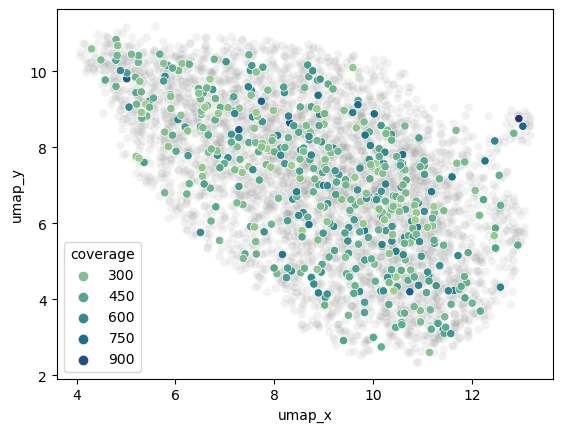

Done with run 8: th. 44.57, # metacells 479, median size 8.0, 17 cells excluded, median coverage 394.87
metacells to process: 949
Iteration 0
metacells to process: 698
Iteration 1
metacells to process: 491
Iteration 2
metacells to process: 356
Iteration 3
metacells to process: 251
Iteration 4
metacells to process: 170
Iteration 5
metacells to process: 99
Iteration 6
metacells to process: 51
Iteration 7
metacells to process: 20
Iteration 8
metacells to process: 4
Iteration 9
metacells to process: 0
DONE with 481 metacells in total


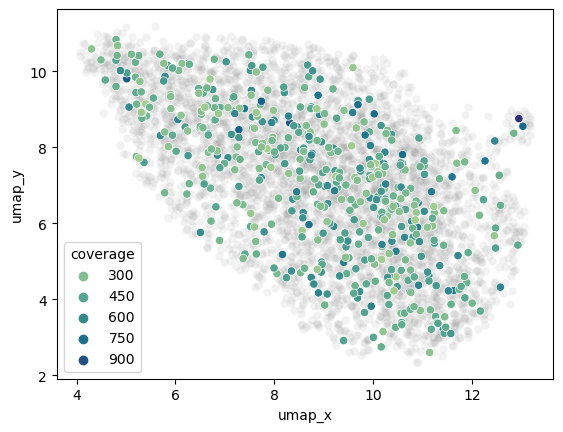

Done with run 9: th. 137.62, # metacells 481, median size 8.0, 0 cells excluded, median coverage 394.87


In [80]:
results = []
for i,d_tresh in enumerate(ts):
    new_df,cell_dict, = create_metacells.merge_cells(d_tresh,clust_df,"leiden_small",adata, min_coverage,max_covergae)
    sns.scatterplot(x = adata.obsm['X_umap'][:,0], y = adata.obsm['X_umap'][:,1], alpha = 0.1, color = "grey")
    sns.scatterplot(x = new_df.umap_x, y = new_df.umap_y, hue = new_df.coverage,palette = "crest", sizes = (1,10))
    plt.show()
    num_meta = new_df.shape[0]
    size_meta = new_df.n_cells.median()
    excluded = len([cell for cell in cell_dict if cell_dict[cell] == "-1"])
    med_cov = new_df.coverage.median()
    reversed_dict = {value: [key for key in cell_dict if cell_dict[key] == value] for value in set(cell_dict.values())}
    stds = [tmp.loc[reversed_dict[key]].std().mean() for key in reversed_dict]
    results.append((d_tresh,num_meta, size_meta, excluded,med_cov, np.mean(stds)))
    print(f"Done with run {i}: th. {d_tresh:.2f}, # metacells {num_meta}, median size {size_meta}, {excluded} cells excluded, median coverage {med_cov:.2f}")
  

In [81]:
res = pd.DataFrame(results, columns = ["t", "# metacells","median_meta_size","cells_excluded","median_coverage", "mean_std"])

In [82]:
res.cells_excluded = res.cells_excluded/adata.obs.shape[0]

In [83]:
res

t  # metacells  median_meta_size  cells_excluded  median_coverage   
0   21.195209          378               5.0        0.442758       290.249597  \
1   26.890749          428               7.0        0.242089       364.576266   
2   29.364419          448               7.0        0.170054       373.806837   
3   31.315743          458               7.0        0.128891       373.952596   
4   33.109869          467               7.0        0.092359       375.732667   
5   34.968216          470               7.0        0.064317       384.117220   
6   37.104623          476               7.0        0.042449       387.305063   
7   39.909722          478               8.0        0.018781       392.016446   
8   44.566531          479               8.0        0.004374       394.873912   
9  137.617737          481               8.0        0.000000       394.873912   

   mean_std  
0  0.485574  
1  0.488842  
2  0.492679  
3  0.495681  
4  0.497717  
5  0.501099  
6  0.502994  
7  0.506190  
8  0.508556  
9  0.508864

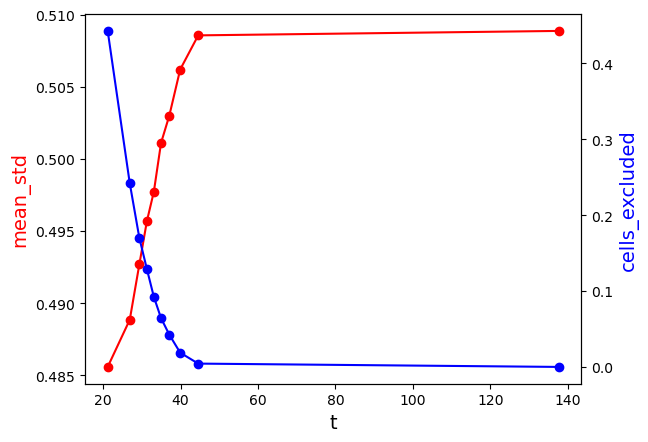

In [90]:
double_figure(res,"t","mean_std","cells_excluded")

In [89]:
def double_figure(res,x,y1,y2):
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(res[x],
            res[y1],
            color="red", 
            marker="o")
    # set x-axis label
    ax.set_xlabel(x, fontsize = 14)
    # set y-axis label
    ax.set_ylabel(y1,
                  color="red",
                  fontsize=14)

    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(res[x], res[y2],color="blue",marker="o")
    ax2.set_ylabel(y2,color="blue",fontsize=14)
    plt.savefig("final_figures/metacells/threshold.png", dpi = 300)
    plt.savefig("final_figures/metacells/threshold.pdf", dpi = 300)
    plt.show()
    # save the plot as a file


In [100]:
new_df,cell_dict, = create_metacells.merge_cells(ts[5],clust_df,"leiden_small",adata, min_coverage,max_covergae)

metacells to process: 949
Iteration 0
metacells to process: 661
Iteration 1
metacells to process: 464
Iteration 2
metacells to process: 322
Iteration 3
metacells to process: 217
Iteration 4
metacells to process: 141
Iteration 5
metacells to process: 82
Iteration 6
metacells to process: 34
Iteration 7
metacells to process: 6
Iteration 8
metacells to process: 0
DONE with 470 metacells in total


In [101]:
new_df.shape[0]

470

In [102]:
new_df.n_cells.median()

7.0

In [103]:
# loss of cells after merging:
# better be less than 10% of the total number of cells (300)
len([cell for cell in cell_dict if cell_dict[cell] == "-1"])

250

In [104]:
new_df[new_df.pass_min == False]

Empty DataFrame
Columns: [cl, coverage, n_cells, umap_x, umap_y, PC_0, PC_1, PC_2, PC_3, PC_4, PC_5, PC_6, PC_7, PC_8, PC_9, PC_10, PC_11, PC_12, PC_13, PC_14, PC_15, PC_16, PC_17, PC_18, PC_19, PC_20, PC_21, PC_22, PC_23, PC_24, PC_25, PC_26, PC_27, PC_28, PC_29, PC_30, PC_31, PC_32, PC_33, PC_34, PC_35, PC_36, PC_37, PC_38, PC_39, PC_40, PC_41, PC_42, PC_43, PC_44, PC_45, PC_46, PC_47, PC_48, PC_49, PC_50, PC_51, PC_52, PC_53, PC_54, PC_55, PC_56, PC_57, PC_58, PC_59, PC_60, PC_61, PC_62, PC_63, PC_64, PC_65, PC_66, PC_67, PC_68, PC_69, PC_70, PC_71, PC_72, PC_73, PC_74, PC_75, PC_76, PC_77, PC_78, PC_79, PC_80, PC_81, PC_82, PC_83, PC_84, PC_85, PC_86, PC_87, PC_88, PC_89, PC_90, PC_91, PC_92, PC_93, PC_94, ...]
Index: []

[0 rows x 1508 columns]

In [105]:
new_df["counts_per_1MB"] = new_df["coverage"]

/tmp/ipykernel_14572/3590890848.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  p2.figure.colorbar(sm)


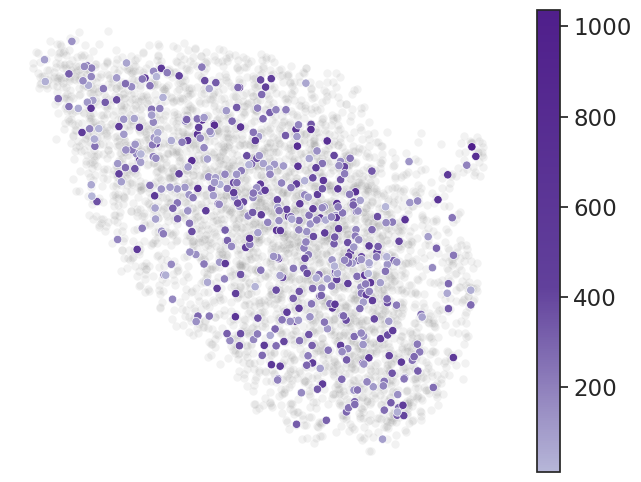

In [320]:
f, ax = plt.subplots(figsize=(8, 6))

p1 = sns.scatterplot(x = adata.obsm['X_umap'][:,0], y = adata.obsm['X_umap'][:,1], alpha = 0.1, color = "grey",
                    ax = ax)
p2 = sns.scatterplot(x = new_df.umap_x, y = new_df.umap_y, hue = new_df.counts_per_1MB,palette = custom_colormap,
                    ax = ax)

norm = plt.Normalize(clust_df.counts_per_1MB.min(), clust_df.counts_per_1MB.max())
sm = plt.cm.ScalarMappable(cmap=custom_colormap, norm=norm)
sm.set_array([])

p2.get_legend().remove()
p2.figure.colorbar(sm)
ax.set_frame_on(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)


plt.savefig("final_figures/metacells/post_metacells.png", dpi = 300)
plt.savefig("final_figures/metacells/post_metacells.pdf", dpi = 300)
plt.show()

<Axes: xlabel='PC_1', ylabel='PC_2'>

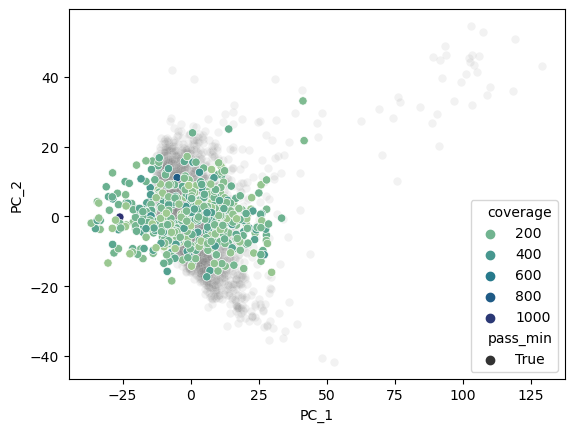

In [99]:
sns.scatterplot(x = adata.obsm['X_pca'][:,0], y = adata.obsm['X_pca'][:,1], alpha = 0.1, color = "grey")
sns.scatterplot(x = new_df.PC_1, y = new_df.PC_2, hue = clust_df.coverage, style = new_df["pass_min"],palette = "crest")

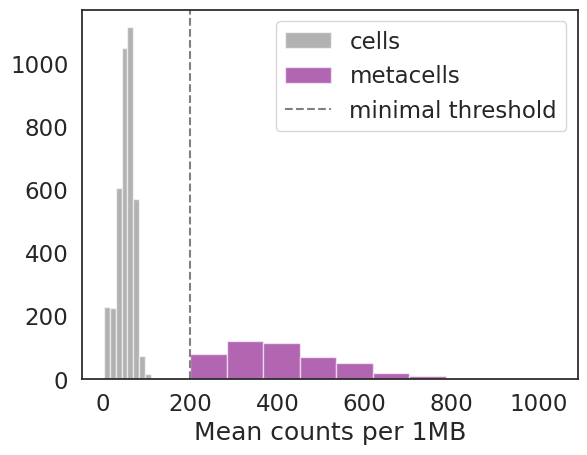

In [132]:
plt.hist(counts_df.mean(axis =1), label = "cells", alpha = 0.6, color = "grey")
plt.hist(new_df.coverage, alpha = 0.6, label = "metacells", color = "purple")

plt.axvline(200, label = "minimal threshold", ls = "--", color = "grey")
plt.legend()
plt.savefig("final_figures/metacells/post_histo.png", dpi = 300)
plt.savefig("final_figures/metacells/post_histo.pdf", dpi = 300)
plt.xlabel("Mean counts per 1MB")
plt.show()

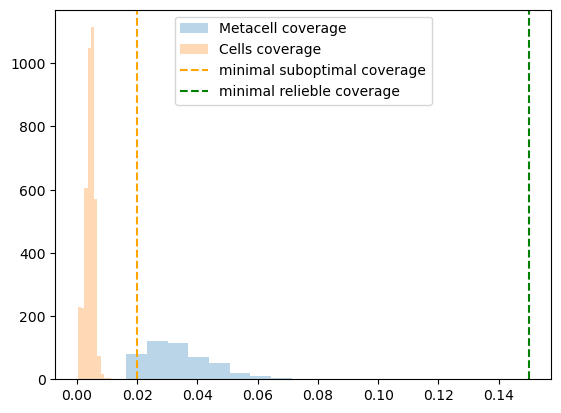

In [108]:
plt.hist((new_df.coverage*82)/1000000, alpha = 0.3, label = "Metacell coverage")
plt.hist((counts_df.mean(axis =1)*82)/1000000, label = "Cells coverage", alpha = 0.3)
plt.axvline(0.02,ls = "--", color = "orange", label = "minimal suboptimal coverage")
plt.axvline(0.15,ls = "--", color = "green", label = "minimal relieble coverage")


plt.legend()

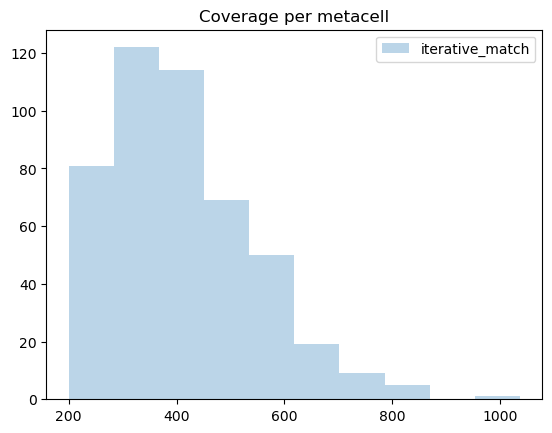

In [109]:
plt.title("Coverage per metacell")
plt.hist(new_df.coverage, alpha = 0.3, label = "iterative_match")
plt.legend()

<function matplotlib.pyplot.savefig(*args, **kwargs)>

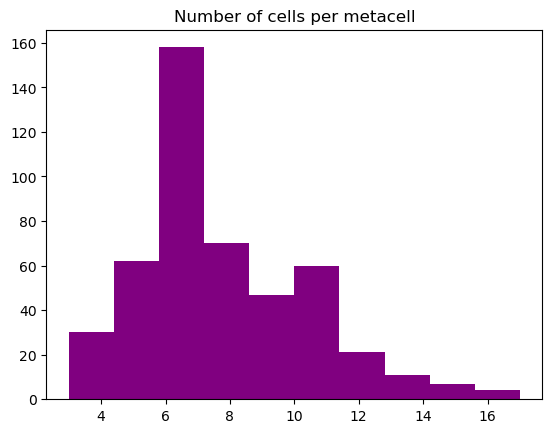

In [111]:
plt.title("Number of cells per metacell")

plt.hist(new_df.n_cells, color = "purple")
plt.savefig("final_figures/metacells/cell_count.png", dpi = 300)
plt.savefig("final_figures/metacells/cell_count.pdf", dpi = 300)
plt.savefig

In [13]:
mc_path = work_dir+'metacells/'

In [113]:
mc_path

'/home/o313a/olga/aurelie_data/LFS041_p63/atac_only/metacells/'

In [66]:
%%bash
mkdir /home/o313a/olga/aurelie_data/LFS041_p63/atac_only/metacells/

In [114]:
%%bash

rm /home/o313a/olga/aurelie_data/LFS041_p63/atac_only/metacells/*

In [115]:
len(new_df.cl.unique())

470

In [116]:
for mc in tqdm(new_df.cl):
    cells = [x for x in cell_dict if cell_dict[x] == mc]

    with open(f'{mc_path}{mc}.txt', 'a') as the_file:
        for cell in cells:
            full_path = f'{work_dir}readCount_filtered_bam/readcounts.100kb.cell_bc_{cell}.seg'
            the_file.write(f'{full_path}\n')

100%|██████████| 470/470 [00:05<00:00, 92.79it/s] 


In [14]:
scaling = dict()
for file in tqdm(glob.glob(f"{mc_path}*.txt")):
    mc = file.split("/")[-1].split(".")[0]
    try:
        scaling[mc]= pd.read_csv(file, sep = "\t", header = None).shape[0]
    except:
        pass


100%|██████████| 470/470 [00:02<00:00, 223.72it/s]


In [16]:
# equal to 1 of you want to keep the same number of cells, otherwise allows to keep the proportion of cells in each metacell
reduction_coef = np.min(list(scaling.values()))

In [17]:
reduction_coef

3

In [18]:
all_clone_files = os.listdir(work_dir+"hmmcopy_metacells/")
len(all_clone_files)

470

In [19]:
cnas = []

for i, cell in tqdm(enumerate(all_clone_files)):
    if cell.endswith(".bed"):
        cell_file = pd.read_csv(work_dir+"hmmcopy_metacells/"+ cell, header = None, sep = '\t')

        cell_file['bin'] = cell_file[0].astype(str) + ':' + cell_file[1].astype(str) + '-' + cell_file[2].astype(str)
        cell_file = cell_file.set_index("bin")
        cell_file = cell_file[[3]]
        scaling_factor = round(scaling[cell.split("_")[0]]/reduction_coef)
        for j in range(scaling_factor):
            tmp = cell_file.copy()
            tmp.columns = ["metacell_" + cell.split("_")[0]+"_"+str(j)]
            cnas.append(tmp)


470it [01:21,  5.78it/s]


In [20]:
cna = pd.concat(cnas,ignore_index=False, axis = 1)

In [21]:
cna.head()

metacell_1789_0  metacell_1789_1  metacell_1789_2   
bin                                                                       
chr1:1-100001                       5                5                5  \
chr1:400001-500001                  5                5                5   
chr1:800001-900001                  5                5                5   
chr1:1200001-1300001                5                5                5   
chr1:1600001-1700001                5                5                5   

                      metacell_1616_0  metacell_1616_1  metacell_1616_2   
bin                                                                       
chr1:1-100001                       5                5                5  \
chr1:400001-500001                  5                5                5   
chr1:800001-900001                  5                5                5   
chr1:1200001-1300001                5                5                5   
chr1:1600001-1700001                5                5                5   

                      metacell_1616_3  metacell_1980_0  metacell_1980_1   
bin                                                                       
chr1:1-100001                       5                4                4  \
chr1:400001-500001                  5                4                4   
chr1:800001-900001                  5                4                4   
chr1:1200001-1300001                5                4                4   
chr1:1600001-1700001                5                4                4   

                      metacell_1980_2  ...  metacell_1791_0  metacell_1791_1   
bin                                    ...                                     
chr1:1-100001                       4  ...                4                4  \
chr1:400001-500001                  4  ...                4                4   
chr1:800001-900001                  4  ...                4                4   
chr1:1200001-1300001                4  ...                4                4   
chr1:1600001-1700001                4  ...                4                4   

                      metacell_1791_2  metacell_1729_0  metacell_1729_1   
bin                                                                       
chr1:1-100001                       4                5                5  \
chr1:400001-500001                  4                5                5   
chr1:800001-900001                  4                5                5   
chr1:1200001-1300001                4                5                5   
chr1:1600001-1700001                4                5                5   

                      metacell_1844_0  metacell_1844_1  metacell_1990_0   
bin                                                                       
chr1:1-100001                       5                5                4  \
chr1:400001-500001                  5                5                4   
chr1:800001-900001                  5                5                4   
chr1:1200001-1300001                5                5                4   
chr1:1600001-1700001                5                5                4   

                      metacell_1938_0  metacell_1938_1  
bin                                                     
chr1:1-100001                       4                4  
chr1:400001-500001                  4                4  
chr1:800001-900001                  4                4  
chr1:1200001-1300001                4                4  
chr1:1600001-1700001                4                4  

[5 rows x 1210 columns]

In [22]:
cna_idx =[(x,x.split(":")[0],int(x.split(":")[1].split("-")[0]),int(x.split(":")[1].split("-")[1])) for x in cna.index]
cna_idx = pd.DataFrame(cna_idx, columns = ["idx", "chrom", "start", "end"])

chrom_num = []
for x in cna_idx["chrom"]:
    if x == "chrX":
        chrom_num.append(23)
    elif x == "chrY":
        chrom_num.append(24)
    else:
        chrom_num.append(int(x[3:]) )
cna_idx["chrom_num"]  = chrom_num
cna_idx = cna_idx.sort_values(['chrom_num', 'start'])


In [23]:
cna_clone = (cna.loc[cna_idx.idx] -1).T

In [24]:
cna_clone.shape

(1210, 30894)

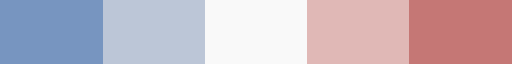

In [25]:
from matplotlib.colors import ListedColormap
newcmp = list(sns.color_palette("vlag",5))
newcmp[2] = "#F9F9F9"
newcmp = ListedColormap(newcmp)   
newcmp

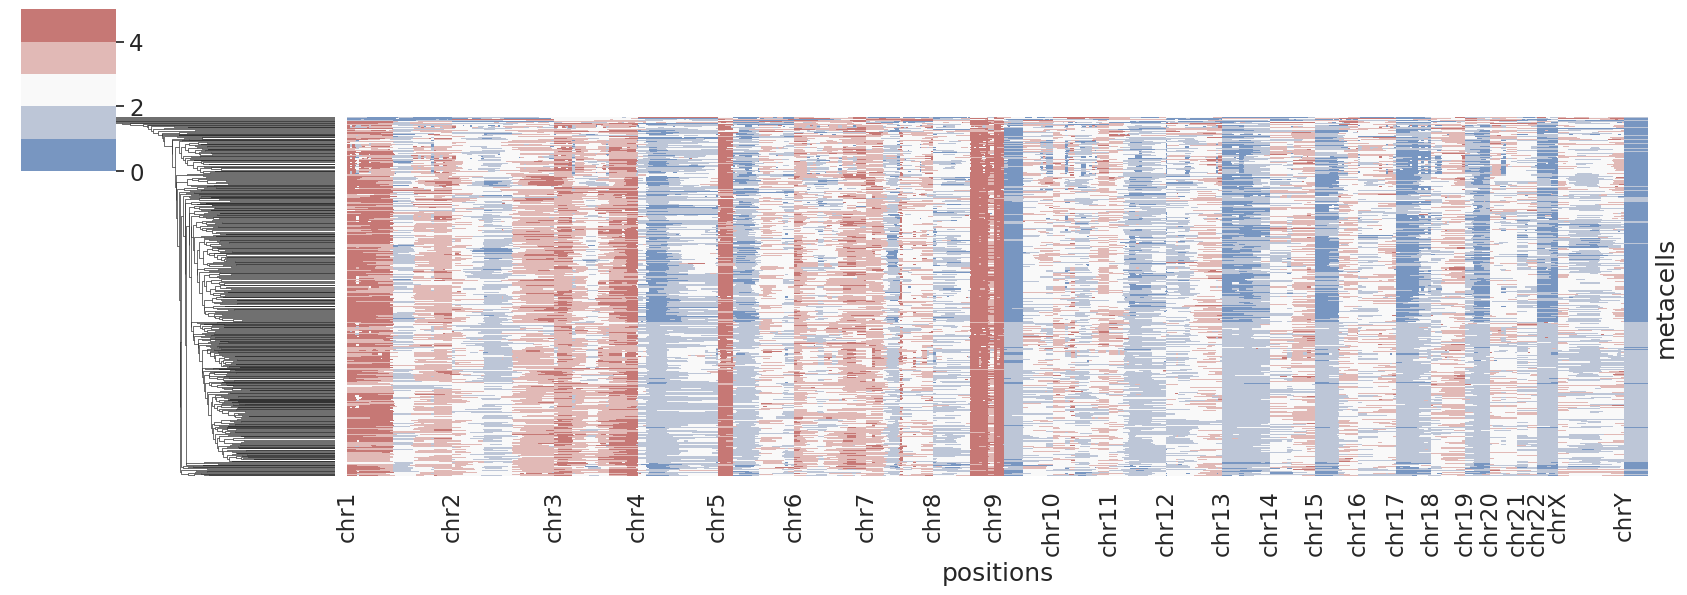

In [26]:
g = sns.clustermap(cna_clone.astype('int32'), col_cluster=False,  row_cluster=True, cmap=newcmp, 
    xticklabels=200, figsize=(19, 9))
ax = g.ax_heatmap
ax.set_xlabel("positions")
ax.set_ylabel("metacells")
ax.set_yticks([])
cut_chroms = [x.split(":")[0] for x in cna_clone.columns]

ax.set_xticks(range(0, len(cut_chroms)), cut_chroms)
xticks = ax.xaxis.get_major_ticks()
prev = ""
for i, label in enumerate(ax.get_xticklabels()):
    if label.get_text() == prev:
        label.set_visible(False)
        xticks[i].set_visible(False)
    prev = label.get_text()
#ax.axvline(5, c = "r")
g.savefig("final_figures/metacells/metacell_heatmap.png", dpi = 300)
# g.savefig("final_figures/metacells/metacell_heatmap.pdf", dpi = 300)

plt.show()

In [47]:
cna_meta = pd.read_csv(work_dir + "cna_meta_long.csv", index_col = 0)

In [49]:
cna_meta.mean().mean()

1.9663518338097687

In [27]:
cna_clone.to_csv(work_dir + "cna_meta_long.csv")

In [28]:
work_dir + "cna_meta_long.csv"

'/home/o313a/olga/aurelie_data/LFS041_p63/atac_only/cna_meta_long.csv'

In [6]:
all_clone_files = os.listdir(work_dir+"hmmcopy_cells/")
len(all_clone_files)

3900

In [7]:
cnas = []

for i, cell in tqdm(enumerate(all_clone_files)):
    if cell.endswith(".bed"):
        cell_file = pd.read_csv(work_dir+"hmmcopy_cells/"+ cell, header = None, sep = '\t')

        cell_file['bin'] = cell_file[0].astype(str) + ':' + cell_file[1].astype(str) + '-' + cell_file[2].astype(str)
        cell_file = cell_file.set_index("bin")
        cell_file = cell_file[[3]]
        cell_file.columns = [cell.split("_")[2]]
        cnas.append(cell_file)


3900it [15:16,  4.25it/s]


In [8]:
cna = pd.concat(cnas,ignore_index=False, axis = 1)

In [9]:
cna.head()

AGTGCCGCAGGACTGA-1  TGTAAGCGTACGTAGG-1   
bin                                                            
chr1:1-100001                          3                   4  \
chr1:400001-500001                     3                   4   
chr1:800001-900001                     3                   4   
chr1:1200001-1300001                   3                   4   
chr1:1600001-1700001                   3                   4   

                      TGACAACAGGTAAGTT-1  TAGGTCATCGGTCTAA-1   
bin                                                            
chr1:1-100001                          5                   3  \
chr1:400001-500001                     5                   3   
chr1:800001-900001                     5                   3   
chr1:1200001-1300001                   5                   3   
chr1:1600001-1700001                   5                   3   

                      TACGCAATCTATCCTA-1  GCATGATAGTCGAAAT-1   
bin                                                            
chr1:1-100001                          3                   4  \
chr1:400001-500001                     3                   4   
chr1:800001-900001                     3                   4   
chr1:1200001-1300001                   3                   4   
chr1:1600001-1700001                   3                   4   

                      TGCATTTGTCCTTCAC-1  GTGTCAAAGGAAACTT-1   
bin                                                            
chr1:1-100001                          4                   4  \
chr1:400001-500001                     4                   4   
chr1:800001-900001                     4                   4   
chr1:1200001-1300001                   4                   4   
chr1:1600001-1700001                   4                   4   

                      TGGCGCATCGATGTGT-1  GCAGATTAGCTACGCC-1  ...   
bin                                                           ...   
chr1:1-100001                          3                   3  ...  \
chr1:400001-500001                     3                   3  ...   
chr1:800001-900001                     3                   3  ...   
chr1:1200001-1300001                   3                   3  ...   
chr1:1600001-1700001                   3                   3  ...   

                      TACGCAATCATGTTCT-1  GTCACTCAGGCCTAAG-1   
bin                                                            
chr1:1-100001                          4                   4  \
chr1:400001-500001                     4                   4   
chr1:800001-900001                     4                   4   
chr1:1200001-1300001                   4                   4   
chr1:1600001-1700001                   4                   4   

                      CCCAGAGGTACCGGCT-1  AGGCCCAGTCGTAATC-1   
bin                                                            
chr1:1-100001                          4                   4  \
chr1:400001-500001                     4                   4   
chr1:800001-900001                     4                   4   
chr1:1200001-1300001                   4                   4   
chr1:1600001-1700001                   4                   4   

                      GTCCATCTCCATAGGT-1  CTCTCGAAGTCTCCAA-1   
bin                                                            
chr1:1-100001                          4                   3  \
chr1:400001-500001                     4                   3   
chr1:800001-900001                     4                   3   
chr1:1200001-1300001                   4                   3   
chr1:1600001-1700001                   4                   3   

                      CTACAGAGTGTTAGAA-1  TCACAGAAGCTTCAAC-1   
bin                                                            
chr1:1-100001                          5                   4  \
chr1:400001-500001                     5                   4   
chr1:800001-900001                     5                   4   
chr1:1200001-1300001                   5                   4   
chr1:160000

In [10]:
cna



AGTGCCGCAGGACTGA-1  TGTAAGCGTACGTAGG-1   
bin                                                              
chr1:1-100001                            3                   4  \
chr1:400001-500001                       3                   4   
chr1:800001-900001                       3                   4   
chr1:1200001-1300001                     3                   4   
chr1:1600001-1700001                     3                   4   
...                                    ...                 ...   
chrY:16700001-16800001                   2                   3   
chrY:25100001-25200001                   2                   3   
chrY:33500001-33600001                   2                   3   
chrY:41900001-42000001                   2                   3   
chrY:50300001-50400001                   2                   3   

                        TGACAACAGGTAAGTT-1  TAGGTCATCGGTCTAA-1   
bin                                                              
chr1:1-100001                            5                   3  \
chr1:400001-500001                       5                   3   
chr1:800001-900001                       5                   3   
chr1:1200001-1300001                     5                   3   
chr1:1600001-1700001                     5                   3   
...                                    ...                 ...   
chrY:16700001-16800001                   2                   3   
chrY:25100001-25200001                   2                   3   
chrY:33500001-33600001                   2                   3   
chrY:41900001-42000001                   2                   3   
chrY:50300001-50400001                   2                   3   

                        TACGCAATCTATCCTA-1  GCATGATAGTCGAAAT-1   
bin                                                              
chr1:1-100001                            3                   4  \
chr1:400001-500001                       3                   4   
chr1:800001-900001                       3                   4   
chr1:1200001-1300001                     3                   4   
chr1:1600001-1700001                     3                   4   
...                                    ...                 ...   
chrY:16700001-16800001                   2                   3   
chrY:25100001-25200001                   2                   3   
chrY:33500001-33600001                   2                   3   
chrY:41900001-42000001                   2                   3   
chrY:50300001-50400001                   2                   3   

                        TGCATTTGTCCTTCAC-1  GTGTCAAAGGAAACTT-1   
bin                                                              
chr1:1-100001                            4                   4  \
chr1:400001-500001                       4                   4   
chr1:800001-900001                       4                   4   
chr1:1200001-1300001                     4                   4   
chr1:1600001-1700001                     4                   4   
...                                    ...                 ...   
chrY:16700001-16800001                   2                   2   
chrY:25100001-25200001                   2                   2   
chrY:33500001-33600001                   2                   2   
chrY:41900001-42000001                   2                   2   
chrY:50300001-50400001                   2                   2   

                        TGGCGCATCGATGTGT-1  GCAGATTAGCTACGCC-1  ...   
bin                                                             ...   
chr1:1-100001                            3                   3  ...  \
chr1:400001-500001                       3                   3  ...   
chr1:800001-900001                       3                   3  ...   
chr1:1200001-1300001                     3                   3  ...   
chr1:1600001-1700001                     3                   3  ...   
...                                    ...                 ...  ...   
chrY:16700001-168000

In [33]:
# cna = cna.T.reindex(index = counts_df_orig.index).dropna(axis = 0).T

NameError: name 'counts_df_orig' is not defined

In [14]:
cna_idx =[(x,x.split(":")[0],int(x.split(":")[1].split("-")[0]),int(x.split(":")[1].split("-")[1])) for x in cna.index]
cna_idx = pd.DataFrame(cna_idx, columns = ["idx", "chrom", "start", "end"])

chrom_num = []
for x in cna_idx["chrom"]:
    if x == "chrX":
        chrom_num.append(23)
    elif x == "chrY":
        chrom_num.append(24)
    else:
        chrom_num.append(int(x[3:]) )
cna_idx["chrom_num"]  = chrom_num
cna_idx = cna_idx.sort_values(['chrom_num', 'start'])


In [15]:
cna_clone = (cna.loc[cna_idx.idx] -1).T

In [16]:
cna_clone.shape

(3900, 30894)

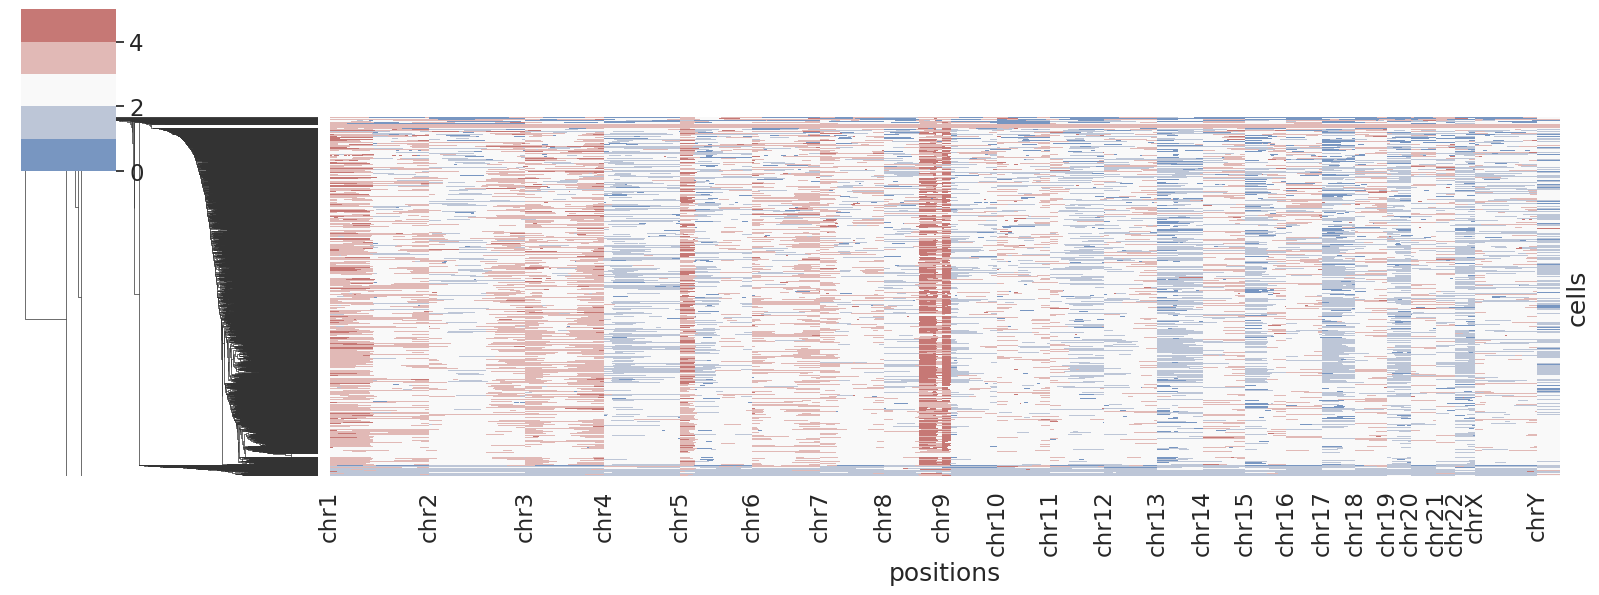

In [38]:
g = sns.clustermap(cna_clone.astype('int32'), col_cluster=False,  row_cluster=True, cmap=newcmp, 
    xticklabels=200, figsize=(19, 9))
ax = g.ax_heatmap
ax.set_xlabel("positions")
ax.set_ylabel("cells")
ax.set_yticks([])
cut_chroms = [x.split(":")[0] for x in cna_clone.columns]

ax.set_xticks(range(0, len(cut_chroms)), cut_chroms)
xticks = ax.xaxis.get_major_ticks()
prev = ""
for i, label in enumerate(ax.get_xticklabels()):
    if label.get_text() == prev:
        label.set_visible(False)
        xticks[i].set_visible(False)
    prev = label.get_text()
#ax.axvline(5, c = "r")
g.savefig("final_figures/metacells/cells_heatmap.png", dpi = 300)

plt.show()

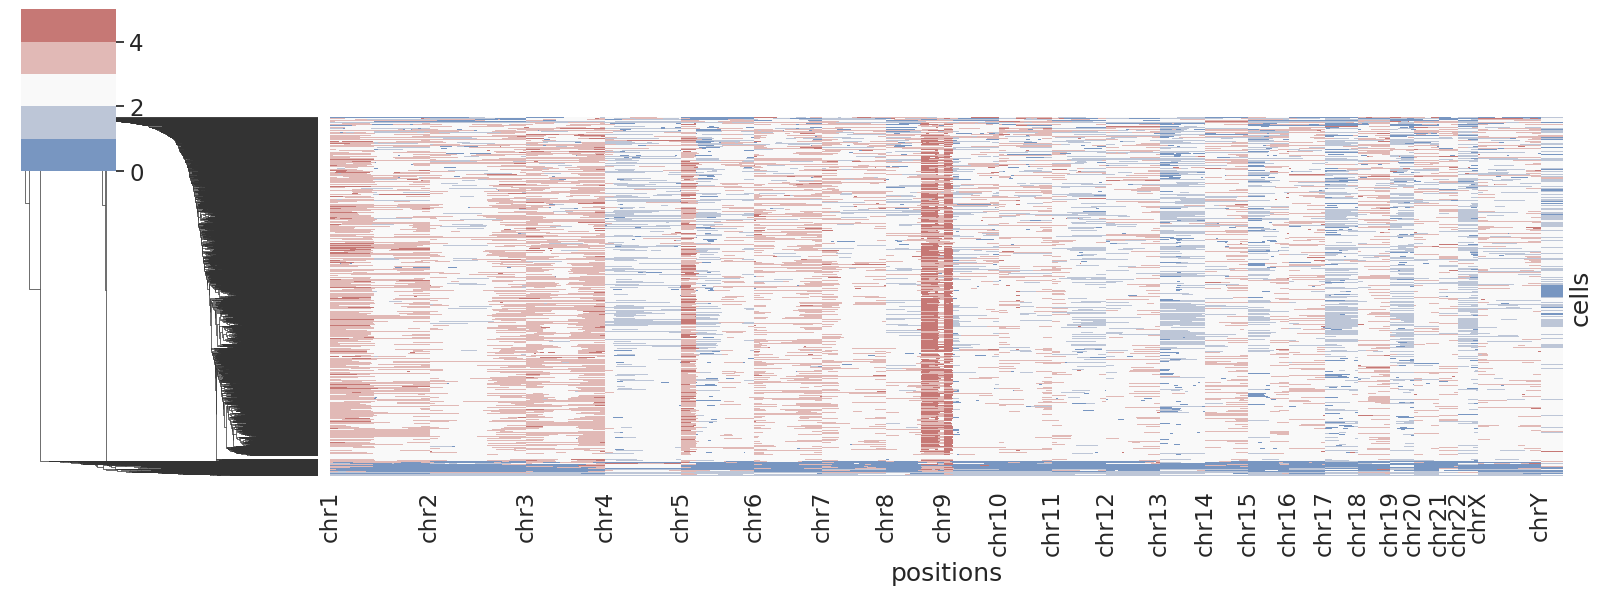

In [163]:
g = sns.clustermap(cna_clone.astype('int32'), col_cluster=False,  row_cluster=True, cmap=newcmp, 
    xticklabels=200, figsize=(19, 9))
ax = g.ax_heatmap
ax.set_xlabel("positions")
ax.set_ylabel("cells")
ax.set_yticks([])
cut_chroms = [x.split(":")[0] for x in cna_clone.columns]

ax.set_xticks(range(0, len(cut_chroms)), cut_chroms)
xticks = ax.xaxis.get_major_ticks()
prev = ""
for i, label in enumerate(ax.get_xticklabels()):
    if label.get_text() == prev:
        label.set_visible(False)
        xticks[i].set_visible(False)
    prev = label.get_text()
#ax.axvline(5, c = "r")
g.savefig("final_figures/metacells/cells_heatmap.png", dpi = 300)

plt.show()

In [39]:
cna_clone.to_csv(work_dir + "cna_cell_long.csv")

In [42]:
cna_clone.mean().mean()

2.0047764564690183

In [43]:
cna_clone.median().median()

2.0

In [88]:
work_dir + "cna_meta_long.csv"

'/home/o313a/olga/aurelie_data/LFS041_p63/atac_only/cna_meta_long.csv'

In [5]:
bulk63 = pd.read_csv("/home/o313a/olga/aurelie_data/bulk/p63_per_bin_calls_long.bed", sep = "\t", header = None)
bulk63.columns = ["chrom_num","start","end","CN","median"]
bulk63.chrom_num = [x[3:] for x in bulk63.chrom_num]
bulk63.chrom_num = bulk63.chrom_num.astype(str)
bulk63["chrom"] = "chr" + bulk63.chrom_num
bulk63.chrom_num = bulk63.chrom_num.replace({"X":23,"Y":24})
bulk63.chrom_num = bulk63.chrom_num.astype(int)


In [6]:
bulk63 = bulk63.sort_values(by = ["chrom_num","start"])
bulk63["CN"] = bulk63["CN"]-1
bulk63

chrom_num     start       end  CN     median chrom
0              1         1    100001   4   0.507235  chr1
260            1    100001    200001   4   0.507235  chr1
261            1    200001    300001   4   0.507235  chr1
262            1    300001    400001   4   0.507235  chr1
1              1    400001    500001   4   0.507235  chr1
...          ...       ...       ...  ..        ...   ...
30836         24  56800001  56900001   0 -12.734731  chrY
30456         24  56900001  57000001   0 -12.734731  chrY
30837         24  57000001  57100001   0 -12.734731  chrY
30838         24  57100001  57200001   0 -12.734731  chrY
30839         24  57200001  57300001   0 -12.734731  chrY

[30894 rows x 6 columns]

In [44]:
bulk63.CN.mean()

2.335210720528258

In [45]:
bulk63.CN.median()

2.0

In [7]:
sns.set(style="white", font_scale = 1.5)


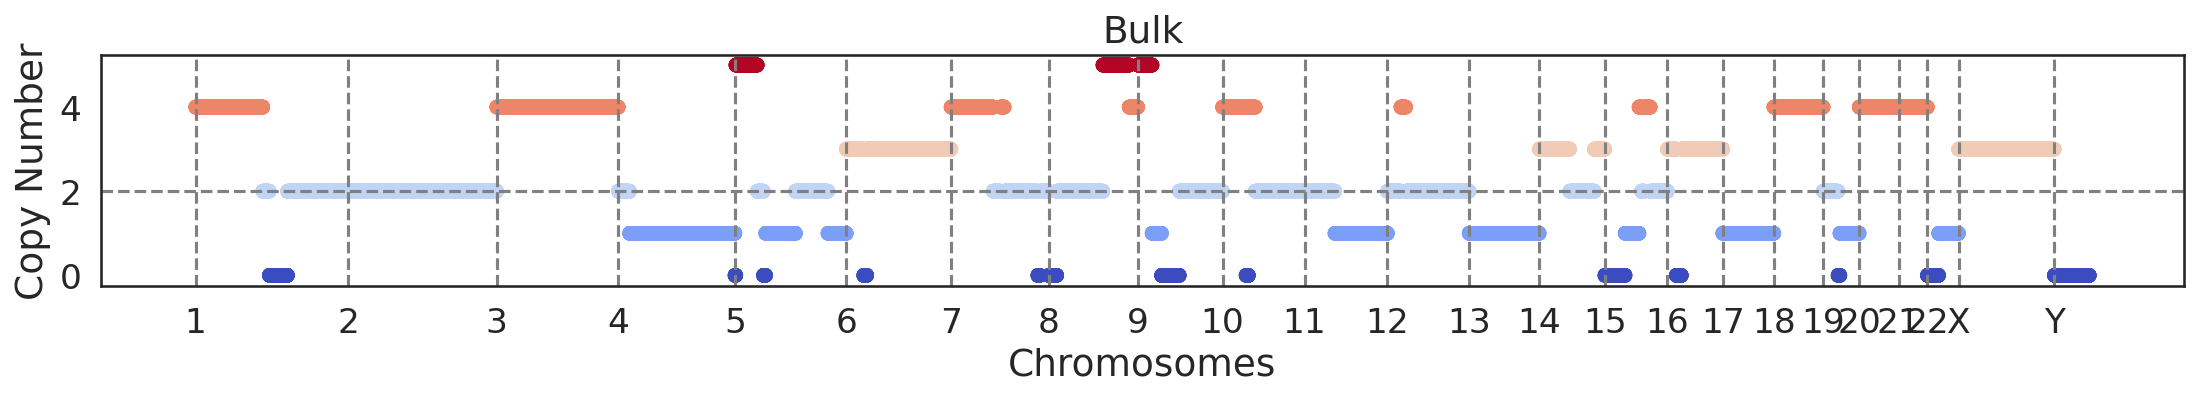

In [8]:
f, axs = plt.subplots(figsize=(15, 3), dpi=150)
#DNA
##################################################
ax = axs
tmp = bulk63.copy()
tmp["chromosome"] = np.arange(tmp.shape[0])
cut_chroms = [x[3:] for x in tmp.chrom]
tmp = tmp.reset_index()


ax.scatter(x = tmp.chromosome.values, y = tmp.CN.values, c = tmp.CN.values, cmap='coolwarm')
#ax.plot(tmp.CN.values, color = "blue")

ax.set_xticks(range(0,len(cut_chroms)),cut_chroms)
xticks = ax.xaxis.get_major_ticks()
prev = ""
for i,label in enumerate(ax.get_xticklabels()):
    if label.get_text() == prev:
        label.set_visible(False)
        xticks[i].set_visible(False)
    prev = label.get_text()
for pos in ax.get_xticklabels():
    pos = pos.get_position()[0]
    ax.axvline(pos, ls = "--", color = "grey")

ax.axhline(2, ls = "--", color = "grey")
ax.set_xlabel("Chromosomes")
ax.set_ylabel("Copy Number")
ax.set_title("Bulk")


plt.tight_layout()
plt.savefig("final_figures/metacells/bulk.png", dpi = 300)
# plt.savefig("final_figures/metacells/bulk.pdf", dpi = 300)

plt.show()


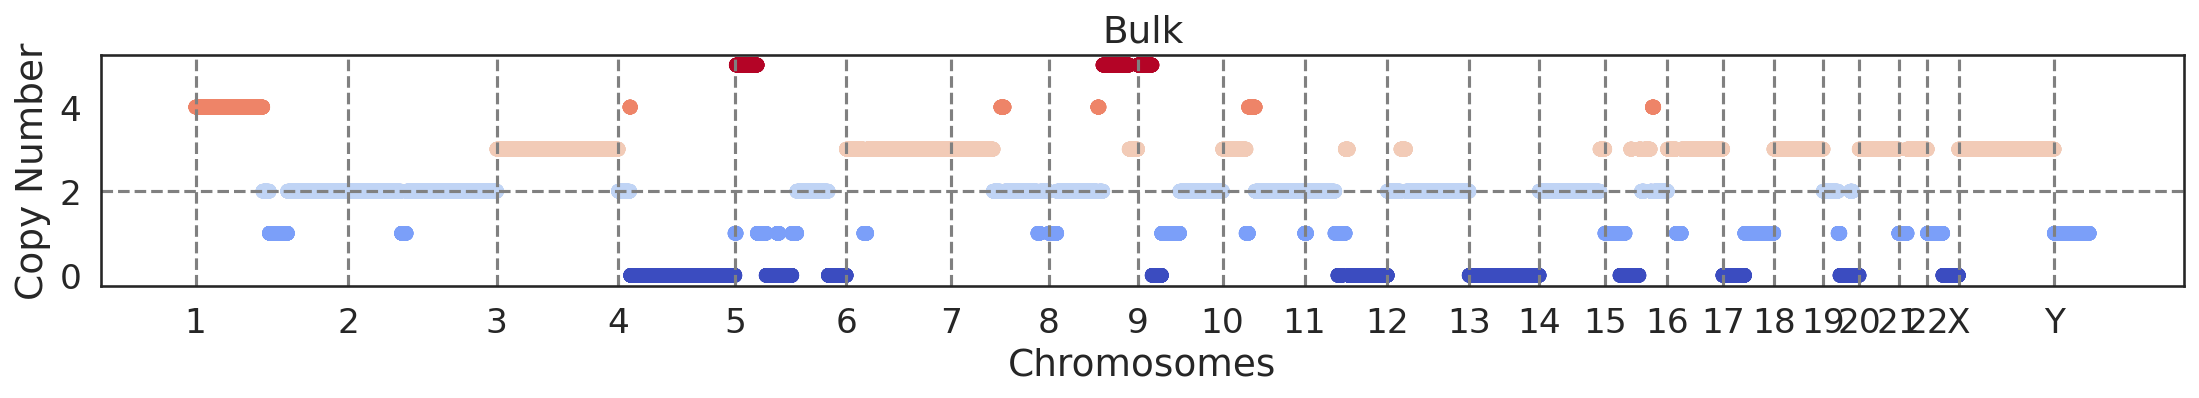

In [135]:
f, axs = plt.subplots(figsize=(15, 3), dpi=150)
#DNA
##################################################
ax = axs
tmp = bulk63.copy()
tmp["chromosome"] = np.arange(tmp.shape[0])
cut_chroms = [x[3:] for x in tmp.chrom]
tmp = tmp.reset_index()


ax.scatter(x = tmp.chromosome.values, y = tmp.CN.values, c = tmp.CN.values, cmap='coolwarm')
#ax.plot(tmp.CN.values, color = "blue")

ax.set_xticks(range(0,len(cut_chroms)),cut_chroms)
xticks = ax.xaxis.get_major_ticks()
prev = ""
for i,label in enumerate(ax.get_xticklabels()):
    if label.get_text() == prev:
        label.set_visible(False)
        xticks[i].set_visible(False)
    prev = label.get_text()
for pos in ax.get_xticklabels():
    pos = pos.get_position()[0]
    ax.axvline(pos, ls = "--", color = "grey")

ax.axhline(2, ls = "--", color = "grey")
ax.set_xlabel("Chromosomes")
ax.set_ylabel("Copy Number")
ax.set_title("Bulk")


plt.tight_layout()
plt.savefig("final_figures/metacells/bulk.png", dpi = 300)
# plt.savefig("final_figures/metacells/bulk.pdf", dpi = 300)

plt.show()


In [8]:
cna_cell = pd.read_csv('/home/o313a/olga/aurelie_data/LFS041_p63/atac_only/cna_cell_long.csv', index_col = 0)

In [9]:
cna_meta = pd.read_csv('/home/o313a/olga/aurelie_data/LFS041_p63/atac_only/cna_meta_long.csv', index_col = 0)

In [10]:
cna_cell = cna_clone.copy()

NameError: name 'cna_clone' is not defined

In [11]:
cna_cell = cna_cell.median()

In [12]:
cna_meta = cna_meta.median()

In [13]:
bulk63.index = [f"{tup.chrom}:{tup.start}-{tup.end}" for tup in bulk63.itertuples()]

In [14]:
df = pd.DataFrame([bulk63.CN,cna_cell, cna_meta], index = ["bulk", "cells", "metacells"]).T

In [15]:
all_vals = pd.DataFrame([df.bulk.to_list() + df.bulk.to_list(), df.cells.to_list() + df.metacells.to_list(), ["cells"] * df.shape[0] + ["metacells"] * df.shape[0]])

In [16]:
all_vals = all_vals.T

In [17]:
all_vals.columns = ["bulk", "single-cell", "type"]

In [18]:
all_vals.bulk = all_vals.bulk.astype(int)
all_vals[ "single-cell"] = all_vals["single-cell"].astype(int)

In [19]:
bulk_vals = [0,1,2,3,4,5]

In [20]:
metacells_medians = []
cells_medians = []
for val in bulk_vals:
    
    cells_medians.append(all_vals[(all_vals.bulk ==val)&(all_vals.type == "cells")]["single-cell"].median())
    metacells_medians.append(all_vals[(all_vals.bulk ==val)&(all_vals.type == "metacells")]["single-cell"].median())


In [21]:
metacells_medians

[1.0, 1.0, 2.0, 2.0, 3.0, 4.0]

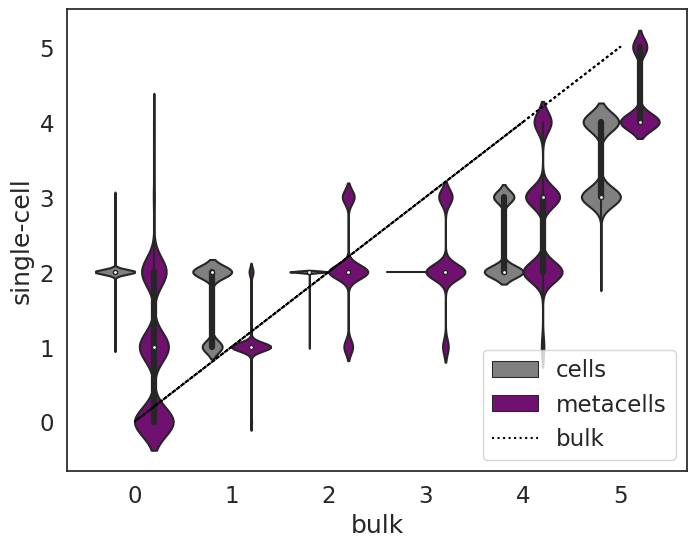

In [22]:
f, ax = plt.subplots(figsize=(8, 6))

sns.violinplot(x="bulk", y="single-cell",hue = "type",data = all_vals, ax = ax,scale = "width",
              palette = ["grey", "purple"])
ax.plot(all_vals.bulk, all_vals.bulk, color = "black", label = "bulk", ls = ":")
# ax.plot(bulk_vals, metacells_medians, color = "purple", label = "metacells median")
# ax.plot(bulk_vals, cells_medians, color = "grey", label = "cells median")

ax.legend()
plt.show()

In [23]:
bulk_vals = np.array(bulk_vals)
metacells_medians = np.array(metacells_medians)

In [24]:
mins_mc = [min(bulk_vals[i],metacells_medians[i]) for i in range(len(bulk_vals))]
maxs_mc = [max(bulk_vals[i],metacells_medians[i]) for i in range(len(bulk_vals))]

mins_c = [min(bulk_vals[i],cells_medians[i]) for i in range(len(bulk_vals))]
maxs_c = [max(bulk_vals[i],cells_medians[i]) for i in range(len(bulk_vals))]

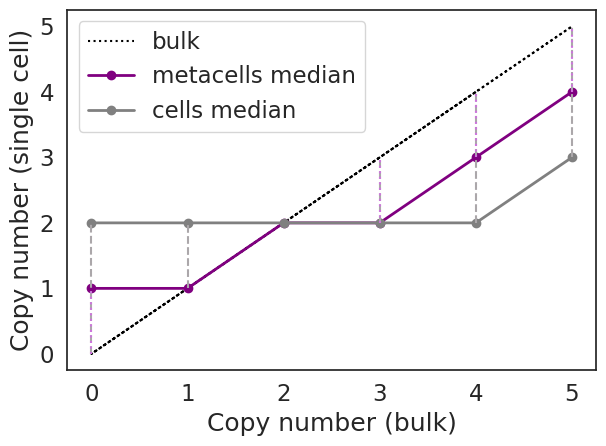

In [25]:
plt.plot(all_vals.bulk, all_vals.bulk, color = "black", label = "bulk", ls = ":")
plt.plot(bulk_vals, metacells_medians, color = "purple", label = "metacells median", marker = "o", lw = 2)
plt.plot(bulk_vals, cells_medians, color = "grey", label = "cells median", marker = "o", lw = 2)
plt.vlines(bulk_vals,mins_c,maxs_c, color = '#aba7aa', ls = "--")
plt.vlines(bulk_vals,mins_mc,maxs_mc, color = '#ce73de', ls = ":")


plt.legend()
plt.xlabel("Copy number (bulk)")
plt.ylabel("Copy number (single cell)")
plt.tight_layout()

plt.savefig("final_figures/metacells/compare.png", dpi = 300)
plt.savefig("final_figures/metacells/compare.pdf", dpi = 300)

plt.show()

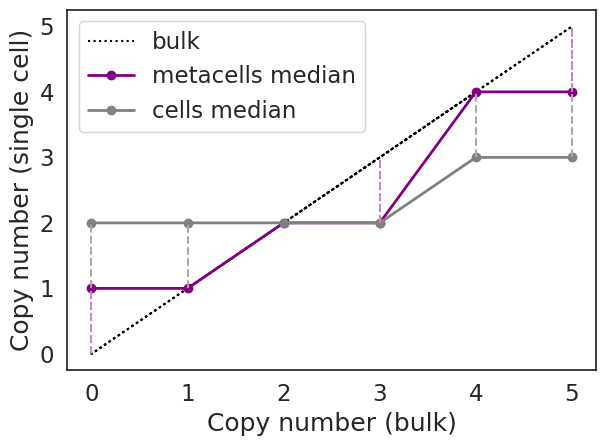

In [317]:
plt.plot(all_vals.bulk, all_vals.bulk, color = "black", label = "bulk", ls = ":")
plt.plot(bulk_vals, metacells_medians, color = "purple", label = "metacells median", marker = "o", lw = 2)
plt.plot(bulk_vals, cells_medians, color = "grey", label = "cells median", marker = "o", lw = 2)
plt.vlines(bulk_vals,mins_c,maxs_c, color = '#aba7aa', ls = "--")
plt.vlines(bulk_vals,mins_mc,maxs_mc, color = '#ce73de', ls = ":")


plt.legend()
plt.xlabel("Copy number (bulk)")
plt.ylabel("Copy number (single cell)")
plt.tight_layout()

plt.savefig("final_figures/metacells/compare.png", dpi = 300)
plt.savefig("final_figures/metacells/compare.pdf", dpi = 300)

plt.show()

In [295]:
metacells_medians

[1.0, 1.0, 2.0, 2.0, 4.0, 4.0]

In [195]:
bulk_red = bulk63.copy()
bulk_red.CN = bulk_red.CN.replace({5:3,4:3,0:1})

In [196]:
cna_meta = cna_meta.replace({5:3,4:3,0:1})

In [197]:
cna_cell = cna_cell.replace({5:3,4:3,0:1})

In [199]:
f, axs = plt.subplots(figsize=(15, 3), dpi=150)
#DNA
##################################################
ax = axs
tmp = bulk63.copy()
tmp["chromosome"] = np.arange(tmp.shape[0])
cut_chroms = [x[3:] for x in tmp.chrom]
tmp = tmp.reset_index()


ax.scatter(x = tmp.chromosome.values, y = tmp.CN.values - cna_meta, color = "purple", alpha = 0.2, label = "metacells")
ax.scatter(x = tmp.chromosome.values, y = tmp.CN.values - cna_cell, color = "green", alpha = 0.2, label = "cells")

ax.plot(tmp.CN.values, color = "blue")

ax.set_xticks(range(0,len(cut_chroms)),cut_chroms)
xticks = ax.xaxis.get_major_ticks()
prev = ""
for i,label in enumerate(ax.get_xticklabels()):
    if label.get_text() == prev:
        label.set_visible(False)
        xticks[i].set_visible(False)
    prev = label.get_text()
for pos in ax.get_xticklabels():
    pos = pos.get_position()[0]
    ax.axvline(pos, ls = "--", color = "grey")

ax.axhline(0, ls = "--", color = "grey")
ax.set_xlabel("Chromosomes")
ax.set_ylabel("Deviation")

plt.legend()
plt.tight_layout()
# plt.savefig("final_figures/metacells/bulk.png", dpi = 300)
# plt.savefig("final_figures/metacells/bulk.pdf", dpi = 300)

plt.show()


KeyboardInterrupt



In [176]:
cna_cell

bin
chr1:1-100001             3.0
chr1:100001-200001        3.0
chr1:200001-300001        3.0
chr1:300001-400001        3.0
chr1:400001-500001        3.0
                         ... 
chrY:56800001-56900001    2.0
chrY:56900001-57000001    2.0
chrY:57000001-57100001    2.0
chrY:57100001-57200001    2.0
chrY:57200001-57300001    2.0
Length: 30894, dtype: float64